<a href="https://colab.research.google.com/github/Tiamiyu1/Python-for-Data-Science-and-Analytics/blob/main/Classes/Day_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analytics Approach (steps)

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

## Read the Dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Tiamiyu1/Python-for-Data-Science-and-Analytics/main/Data/supermarket_data.csv')

## Data Description

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

The data has 1000 entries with 17 variables


All the columns are completely filled (no null value)

In [4]:
data.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


In [6]:
data.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [7]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [8]:
data.Branch.value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [9]:
data.City.value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [10]:
data.City.replace({'Yangon':'Lagos', 'Mandalay':'Ibadan','Naypyitaw':'Akwa-Ibom'}, inplace=True)

In [11]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [12]:
data.drop(['Branch', 'Invoice ID', 'Tax 5%'], axis=1, inplace=True)

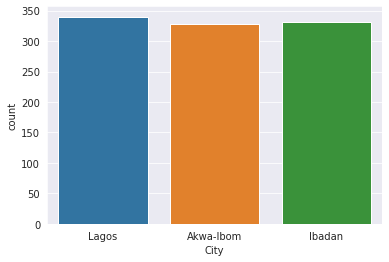

In [13]:
sns.countplot(data.City)

## Data Cleaning and Preprocessing

In [14]:
data.isnull().sum()

City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [15]:
data.isnull().sum()/data.shape[0]

City                       0.0
Customer type              0.0
Gender                     0.0
Product line               0.0
Unit price                 0.0
Quantity                   0.0
Total                      0.0
Date                       0.0
Time                       0.0
Payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
Rating                     0.0
dtype: float64

## Data Engineering

In [16]:
data['Date'] = pd.to_datetime(data.Date)

In [17]:
import datetime as dt
data['Year'] = data['Date'].dt.year

In [18]:
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day


In [19]:
city_data =data.groupby('City')

In [20]:
city_data.mean()

,Unit price,Quantity,Total,cogs,gross margin percentage,gross income,Rating,Year,Month,Day
City,,,,,,,,,,
Akwa-Ibom,56.609024,5.582317,337.099715,321.047348,4.761905,16.052367,7.072866,2019.0,1.951220,15.109756
Ibadan,55.659277,5.481928,319.872506,304.640482,4.761905,15.232024,6.818072,2019.0,2.003012,15.265060
Lagos,54.780853,5.467647,312.354031,297.480029,4.761905,14.874001,7.027059,2019.0,2.023529,15.388235


## Data Visualization

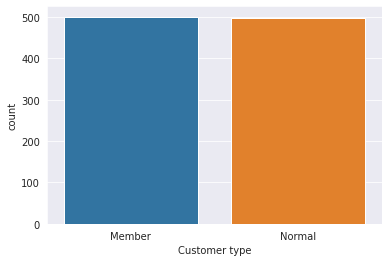

In [21]:
sns.countplot('Customer type', data=data)

In [22]:
data['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

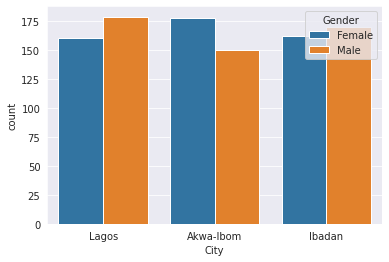

In [23]:
sns.countplot('City',  hue='Gender',data=data)

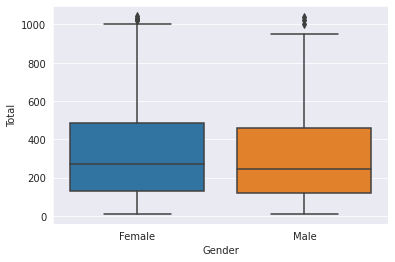

In [24]:
sns.boxplot(y = 'Total',x='Gender', data=data)

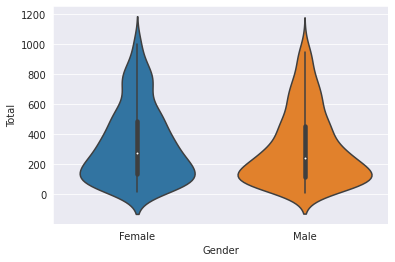

In [25]:
sns.violinplot(y = 'Total',x='Gender', data=data)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

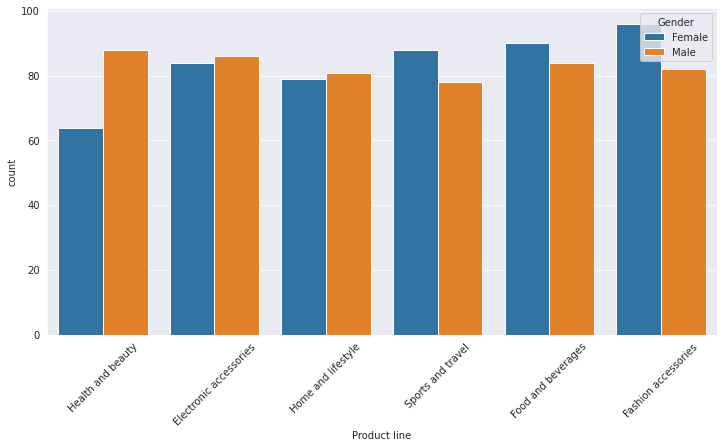

In [26]:
plt.figure(figsize=(12,6))
sns.countplot('Product line', hue='Gender', data=data)
plt.xticks(rotation=45)

In [27]:
data.columns

Index(['City', 'Customer type', 'Gender', 'Product line', 'Unit price',
       'Quantity', 'Total', 'Date', 'Time', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'Year', 'Month',
       'Day'],
      dtype='object')

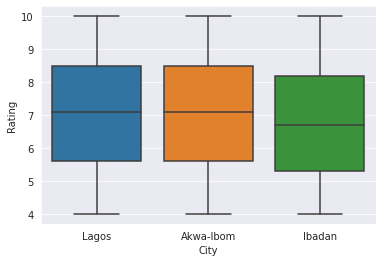

In [28]:
sns.boxplot(y= 'Rating',x='City', data=data)

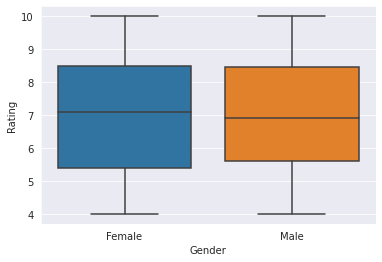

In [29]:
sns.boxplot(y= 'Rating',x='Gender', data=data)

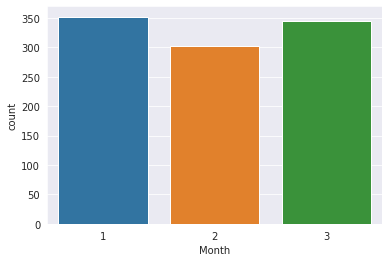

In [30]:
sns.countplot('Month', data=data)

## Observations and Conclusion

More female customers than male

Males buy more health and beauty products than females

Females gives higher rating than male on average

Most sales occured in January



---
---
---





# Introduction to Machine Learning

### Artificial Intelligence

Supervised Learning - fraud, cancer, pass, salary, loan default

Unsupervised Learning- Clustering

Semi-supervised Learning

Reinforcement Learning - Self-driving car

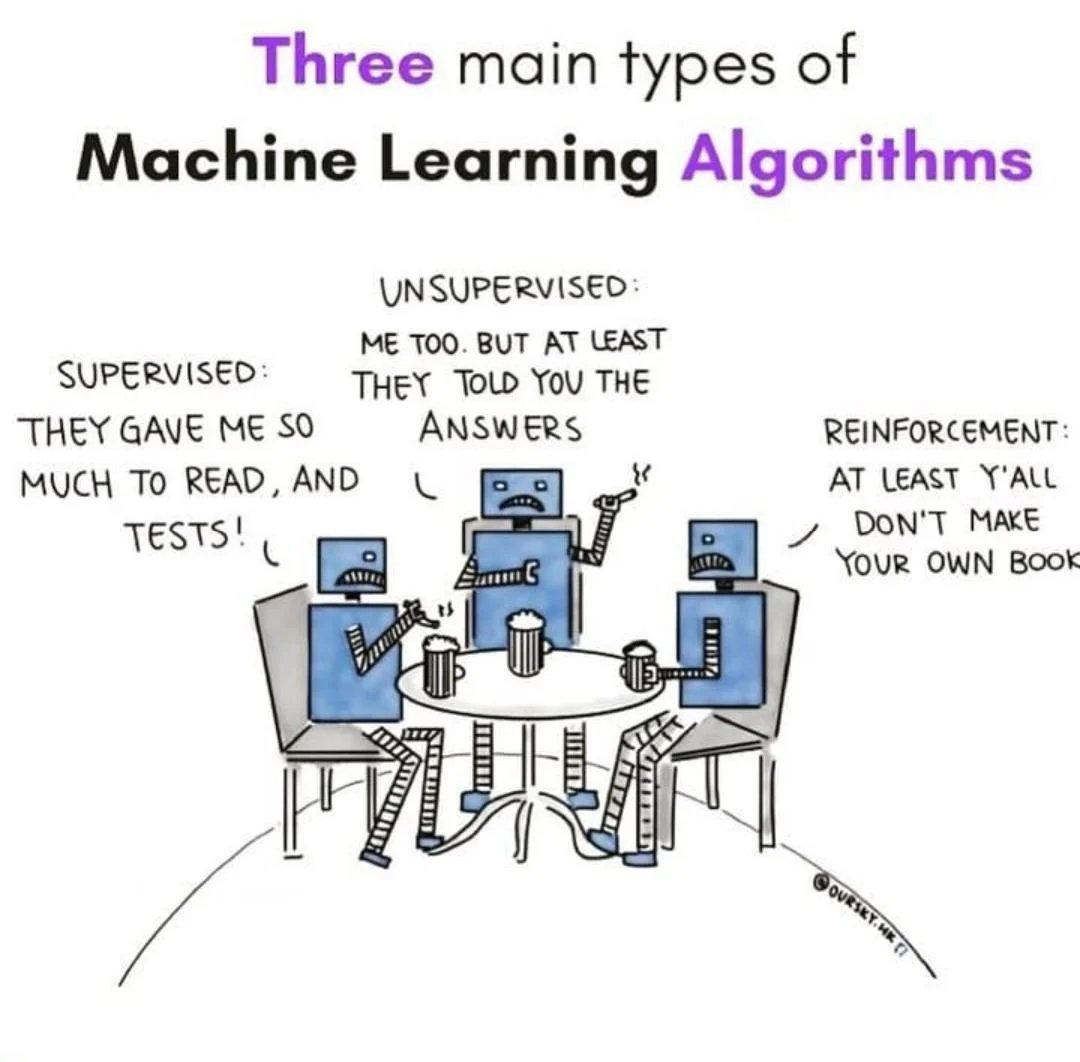